In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('../../EDA/data/train.csv', usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

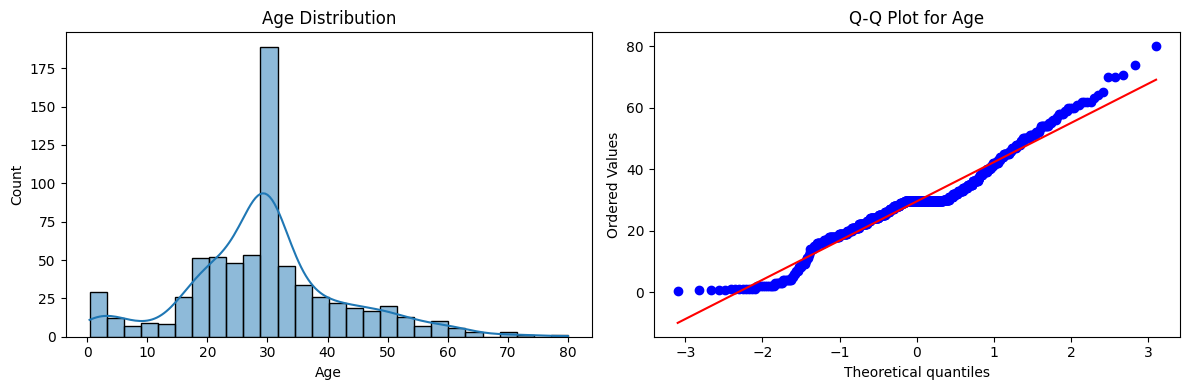

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(X_train['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

stats.probplot(X_train['Age'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for Age')

plt.tight_layout()
plt.show()

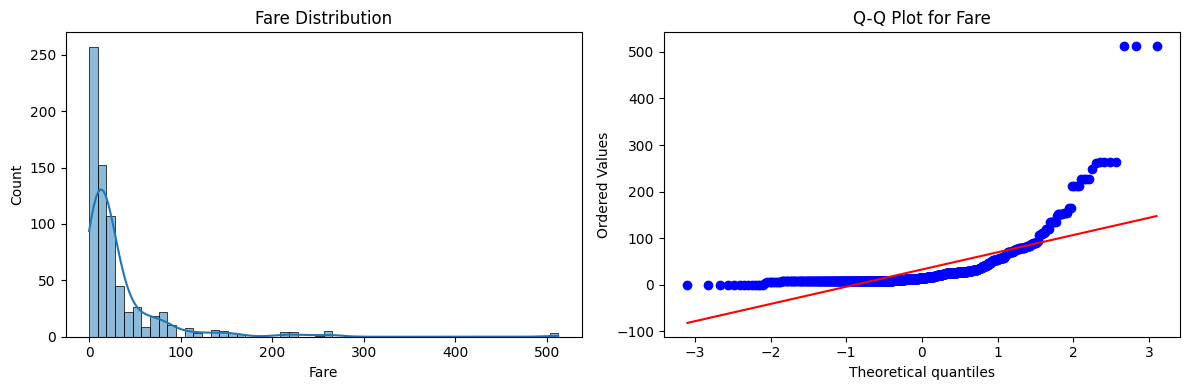

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(X_train['Fare'], kde=True, ax=axes[0])
axes[0].set_title('Fare Distribution')

stats.probplot(X_train['Fare'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for Fare')
plt.tight_layout()
plt.show()

In [26]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [27]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))


Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.664804469273743


In [29]:

trf = FunctionTransformer(func=np.log1p)

In [30]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [31]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6871508379888268


In [33]:
X_transformed = trf.fit_transform(df.drop('Survived', axis=1))

print("LR: ", cross_val_score(clf, X_transformed, df['Survived'], scoring='accuracy', cv=10).mean())
print("DT: ", cross_val_score(clf2, X_transformed, df['Survived'], cv=10).mean())

LR:  0.678027465667915
DT:  0.6666791510611735


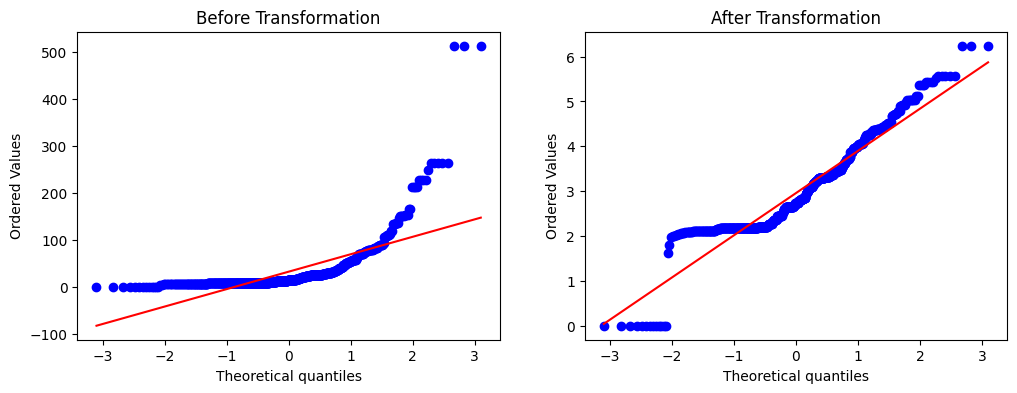

In [36]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

stats.probplot(X_train['Fare'], dist="norm", plot=axes[0])
axes[0].set_title('Before Transformation')

stats.probplot(X_train_transformed['Fare'], dist="norm", plot=axes[1])
axes[1].set_title('After Transformation')

plt.show()


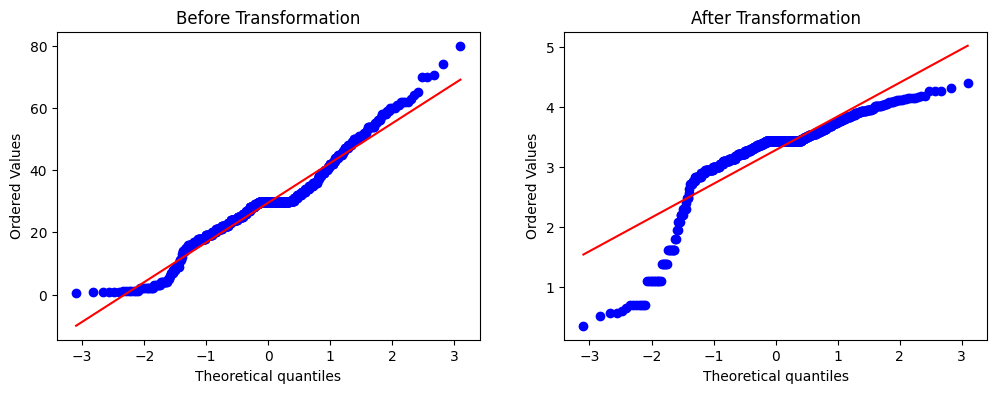

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

stats.probplot(X_train["Age"], dist="norm", plot=axes[0])
axes[0].set_title('Before Transformation')

stats.probplot(X_train_transformed["Age"], dist="norm", plot=axes[1])
axes[1].set_title('After Transformation')

plt.show()

In [38]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(func=np.log1p), ['Fare'])
], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)


In [43]:
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Descision Tree Accuracy:", accuracy_score(y_test, y_pred2))


Logistic Regression Accuracy: 0.6703910614525139
Descision Tree Accuracy: 0.6815642458100558


In [45]:
X_transformed2 = trf.fit_transform(df.drop('Survived', axis=1))

print("LR: ", cross_val_score(clf, X_transformed2, df['Survived'], scoring='accuracy', cv=10).mean())
print("DT: ", cross_val_score(clf2, X_transformed2, df['Survived'], scoring='accuracy', cv=10).mean())

LR:  0.678027465667915
DT:  0.6611235955056181


In [65]:
def apply_transform(transform):
    X = df[['Age', 'Fare']]
    y = df['Survived']

    trf = ColumnTransformer([
        ('Transform', FunctionTransformer(func=transform), ['Fare'])
    ],
    remainder='passthrough')
    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    stats.probplot(X['Fare'], dist="norm", plot=axes[0])
    axes[0].set_title('Fare Before Transform')

    stats.probplot(X_trans[:, 0], dist="norm", plot=axes[1])
    axes[1].set_title('Fare After Transform')

    plt.tight_layout()
    plt.show()

Accuracy 0.6150561797752809


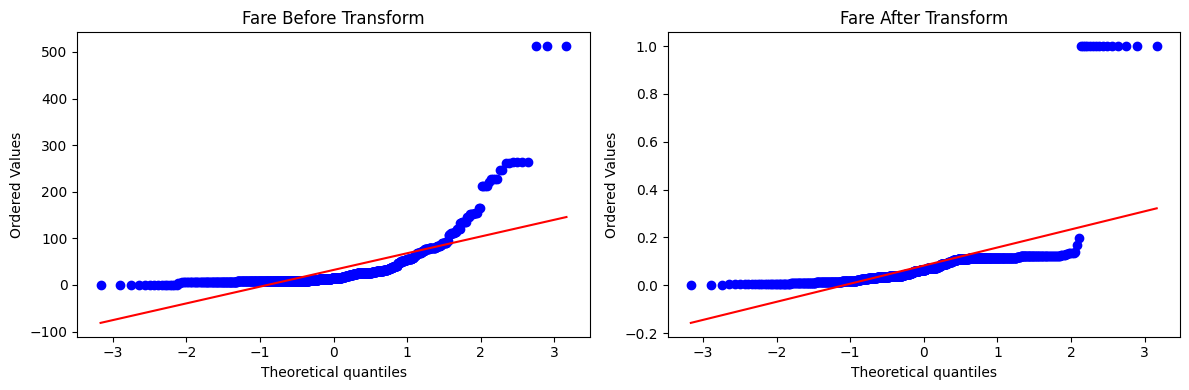

In [71]:
apply_transform(lambda x: (1/(x+1)))